<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [19]:
df = pd.read_csv('House Prices.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">EDA</h1>

In [20]:
df.shape

(333, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [22]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [23]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df = df.drop(columns='ID')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualization</h1>

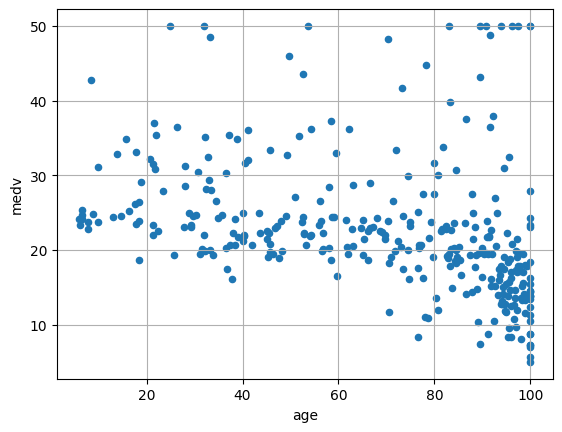

In [26]:
df.plot(kind="scatter", x="age", y="medv", grid=True)
plt.show()

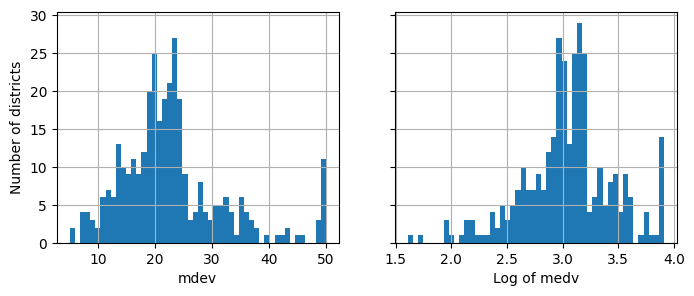

In [27]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["medv"].hist(ax=axs[0], bins=50)
df["medv"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("mdev")
axs[1].set_xlabel("Log of medv")
axs[0].set_ylabel("Number of districts")
plt.show()

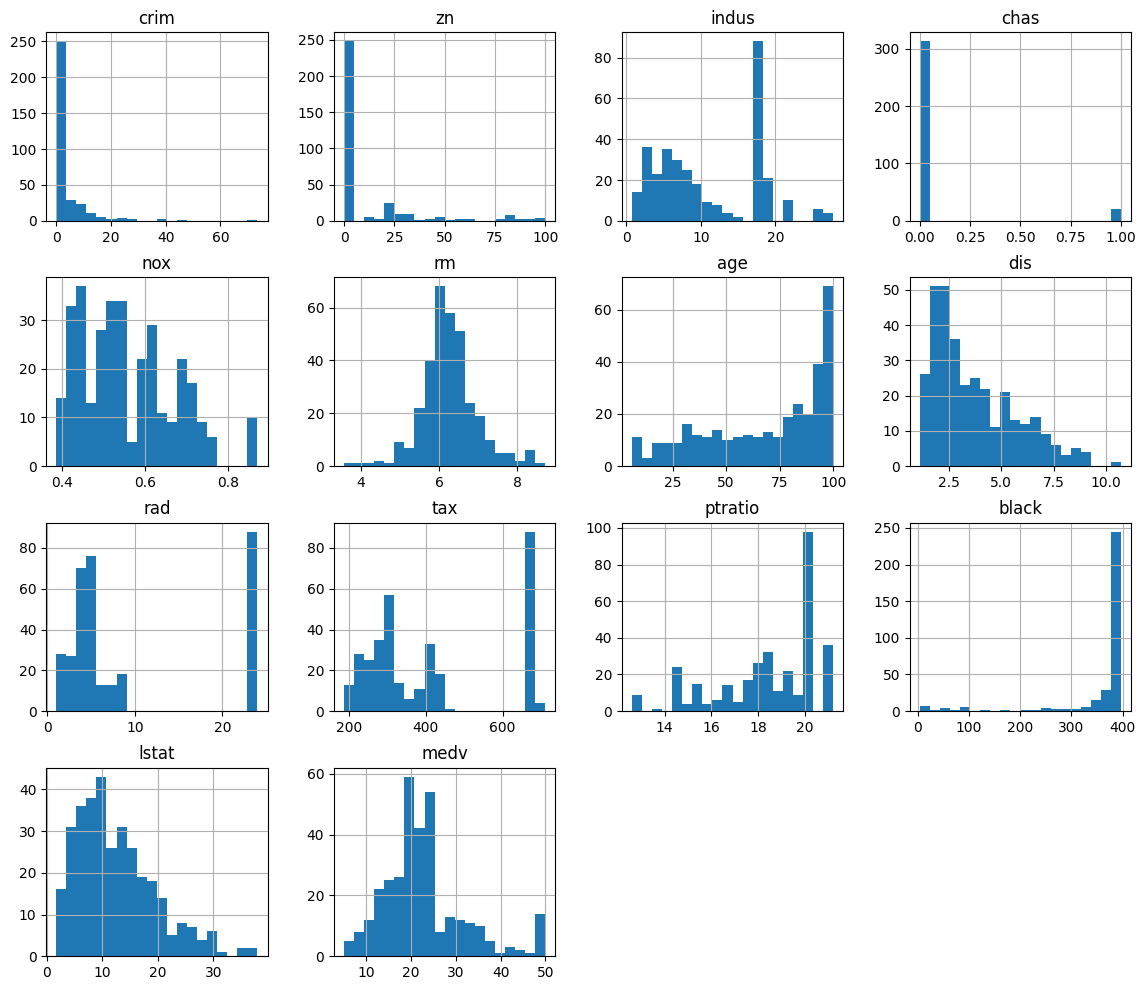

In [28]:
df.hist(figsize=(14, 12), bins=20)
plt.show()

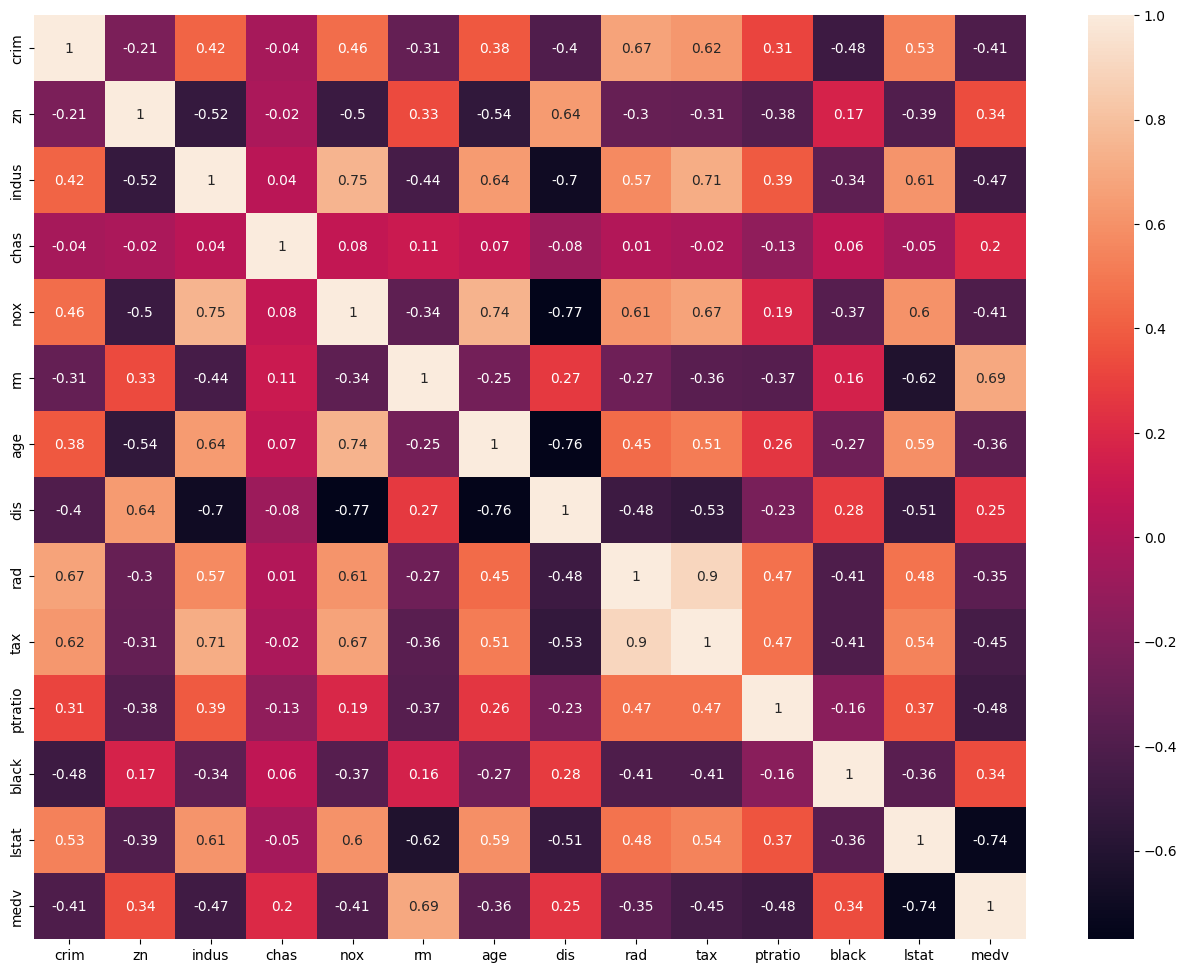

In [29]:
plt.subplots(figsize=(16, 12))
correlation = df.corr().round(2)
sns_plot = sns.heatmap(correlation, annot=True)

In [30]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

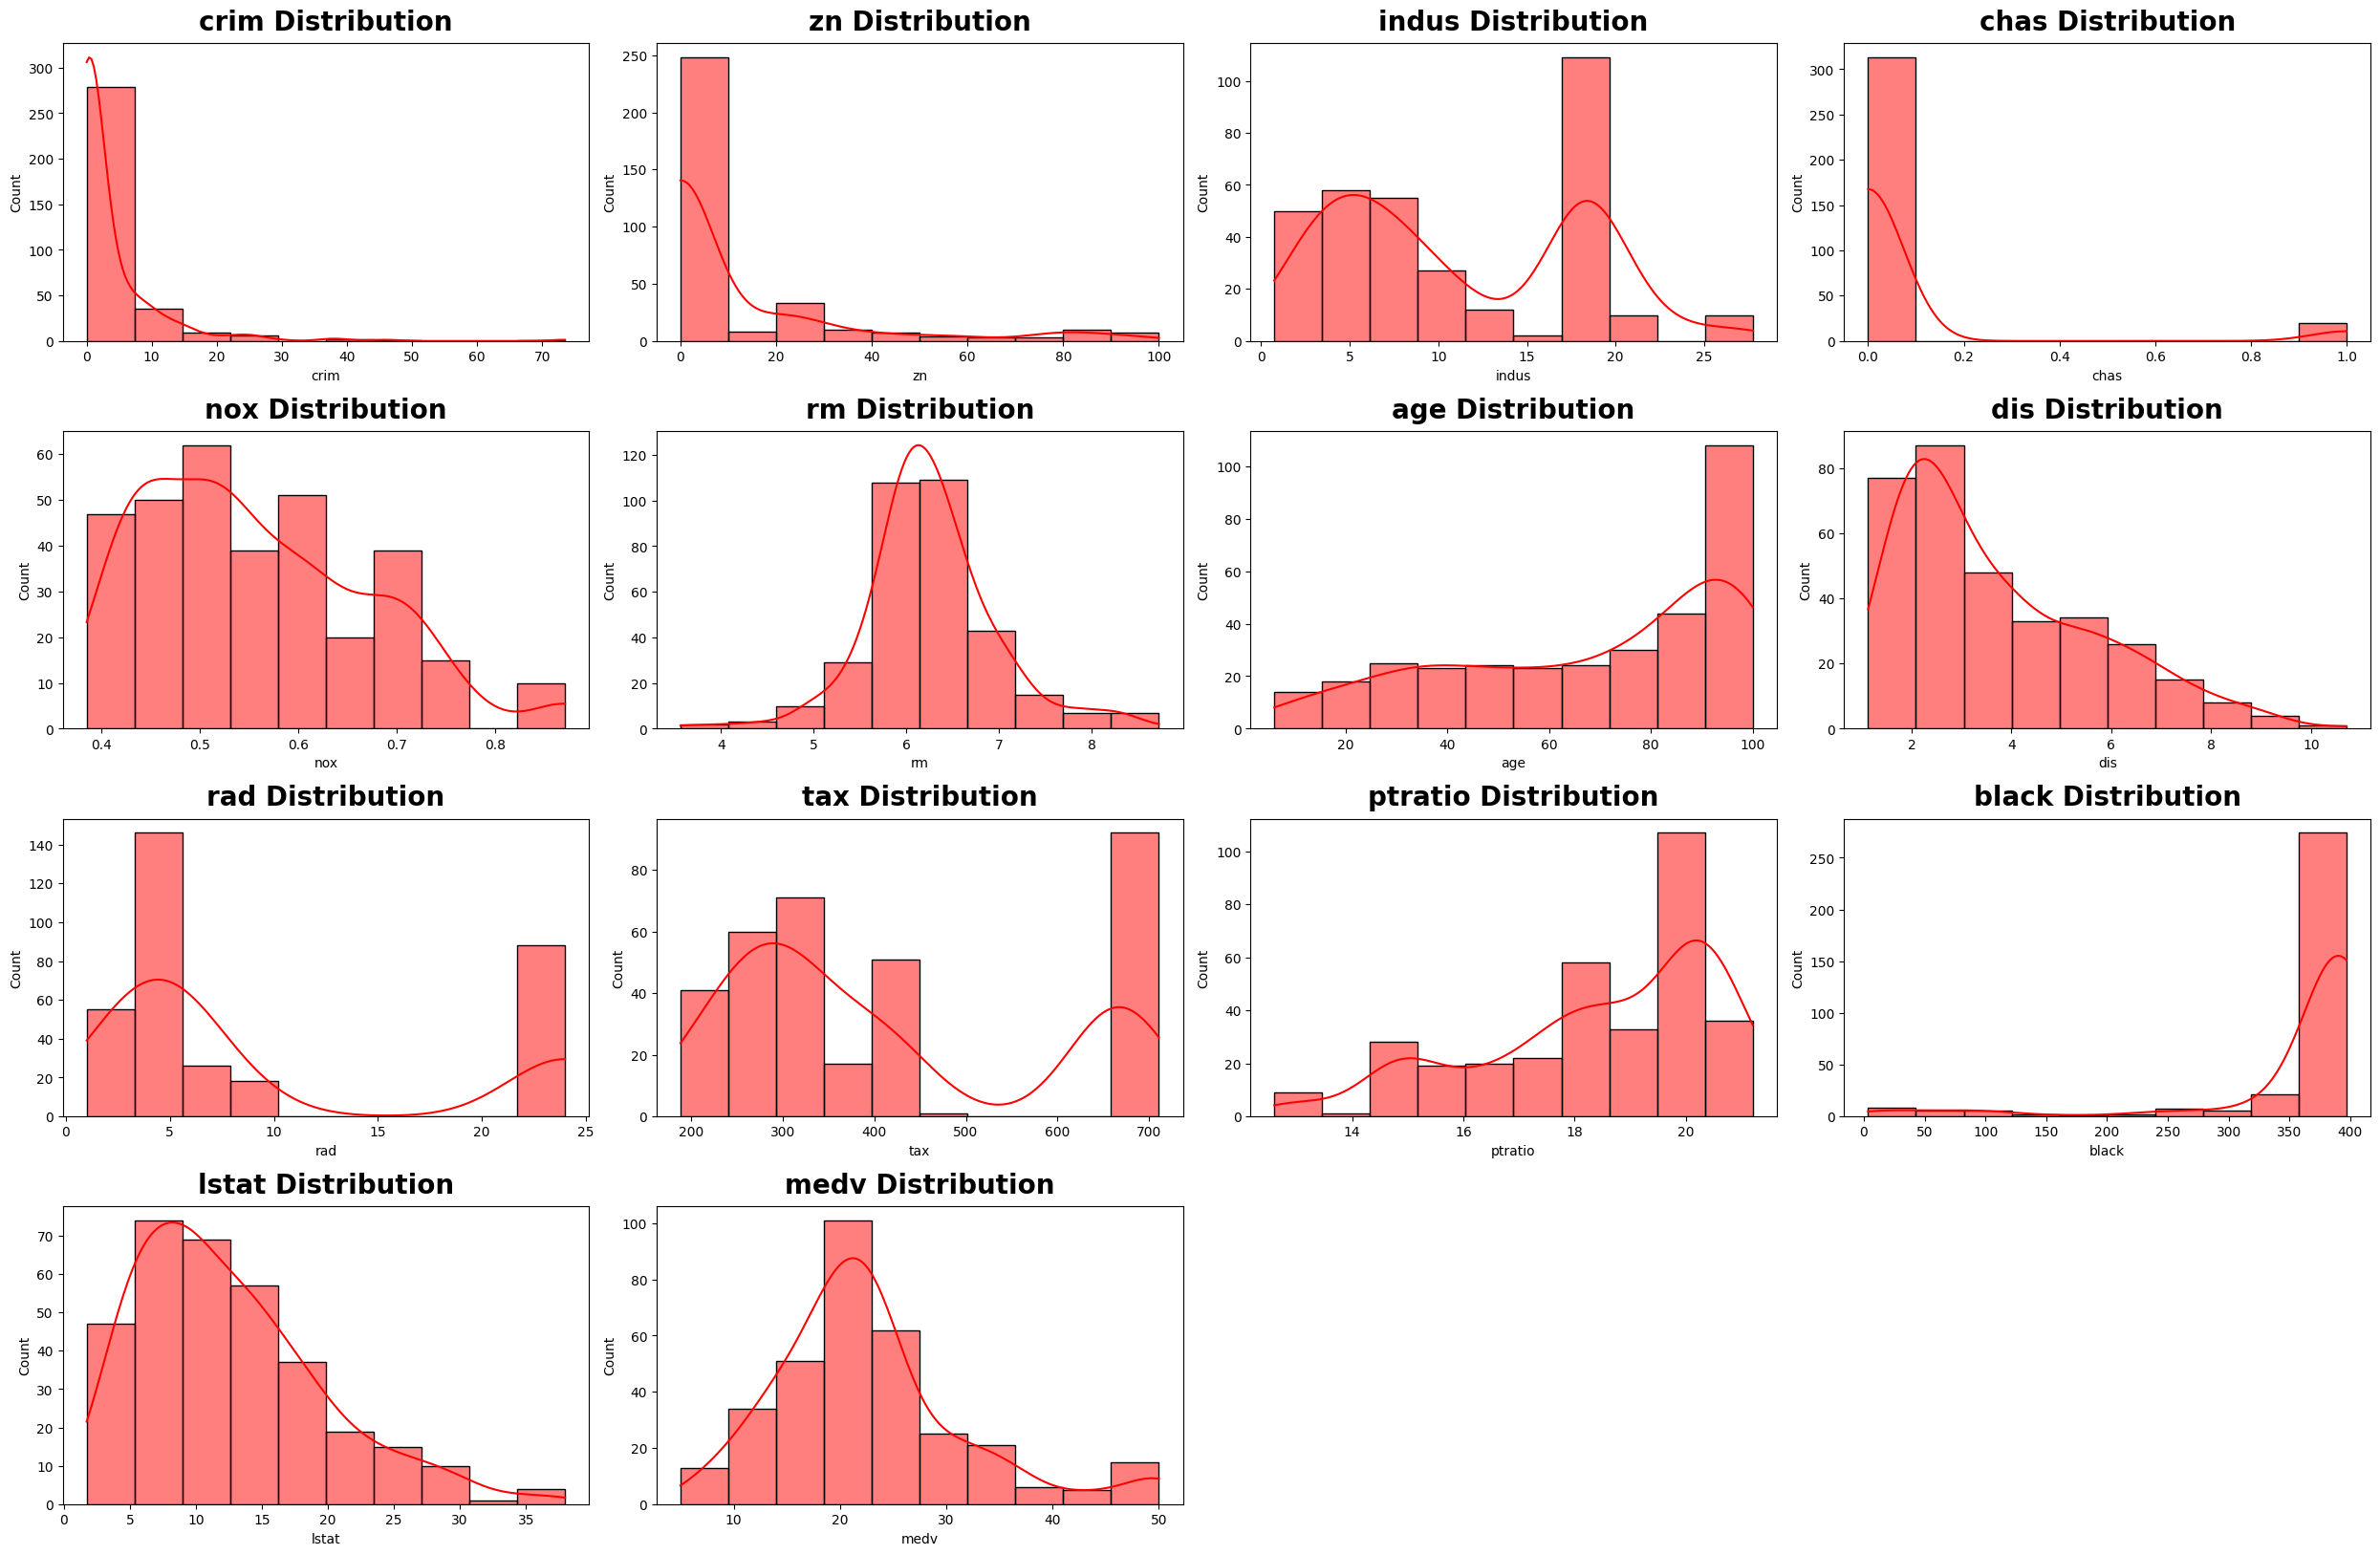

In [31]:
con_cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'black', 'lstat', 'medv']

plt.figure(figsize=(25, 20))
for index, column in enumerate(con_cols):
    plt.subplot(5, 4, index+1)
    sns.histplot(df[column], bins=10, kde=True, color="red")
    plt.title(f"{column} Distribution", fontweight="black", size=20, pad=10)
    plt.tight_layout()

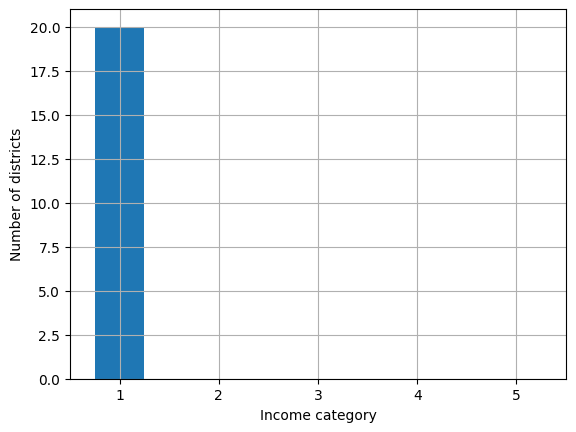

In [32]:
df["income_cat"] = pd.cut(df["chas"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

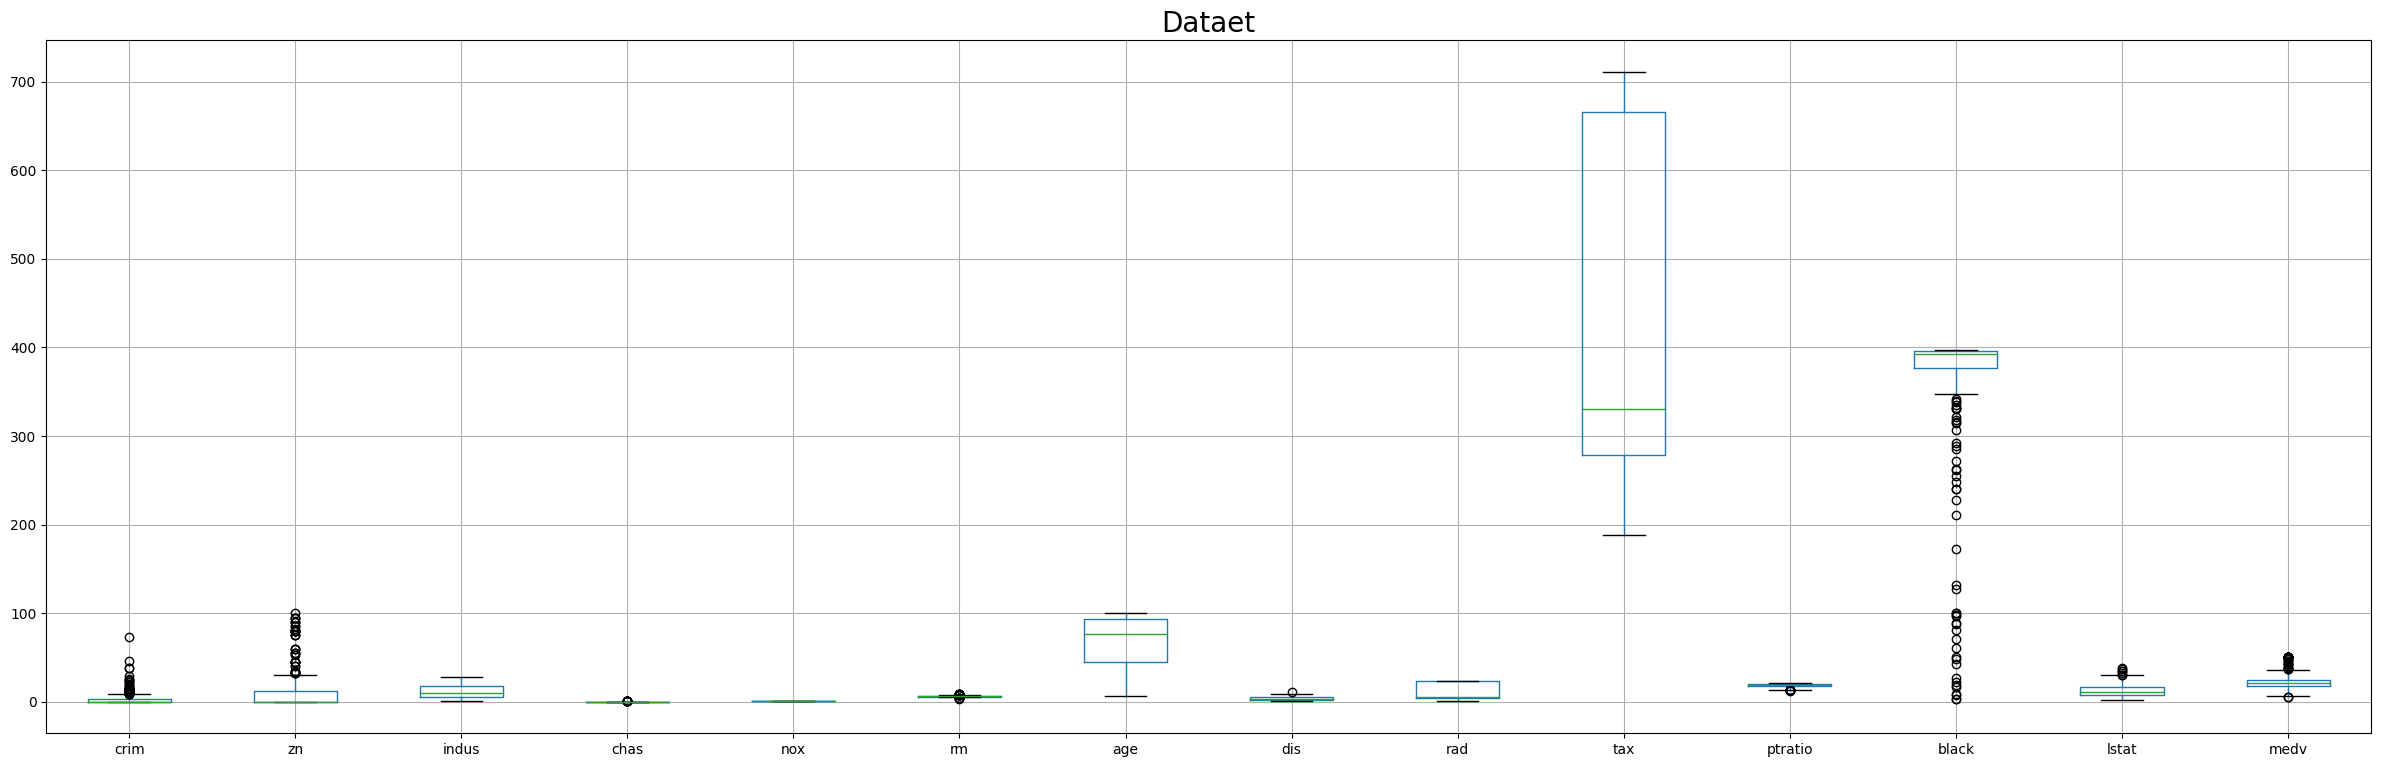

In [33]:
plt.figure(figsize=(30, 9))
df.boxplot()
plt.title("Dataet", fontsize=20)
plt.show()

<Axes: xlabel='medv', ylabel='Density'>

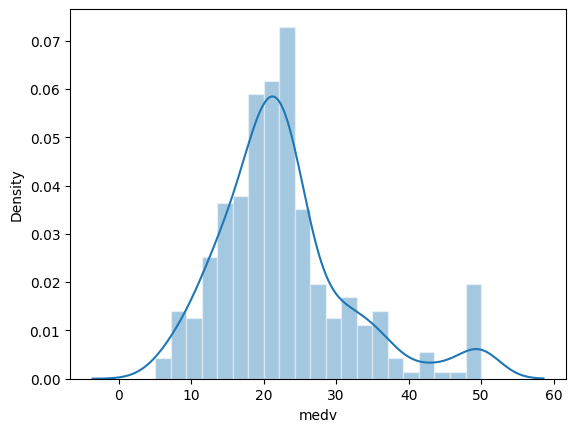

In [34]:
sns.histplot(df['medv'], kde=True, kde_kws=dict(cut=3),
            stat="density", alpha=.4, edgecolor=(1, 1, 1, .4))

In [35]:
X = df.drop(columns='medv')
Y = df['medv']

In [36]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,income_cat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,NaN


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Scaling</h1>

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # only for trainning data
X_test = scaler.transform(X_test)        # for any data

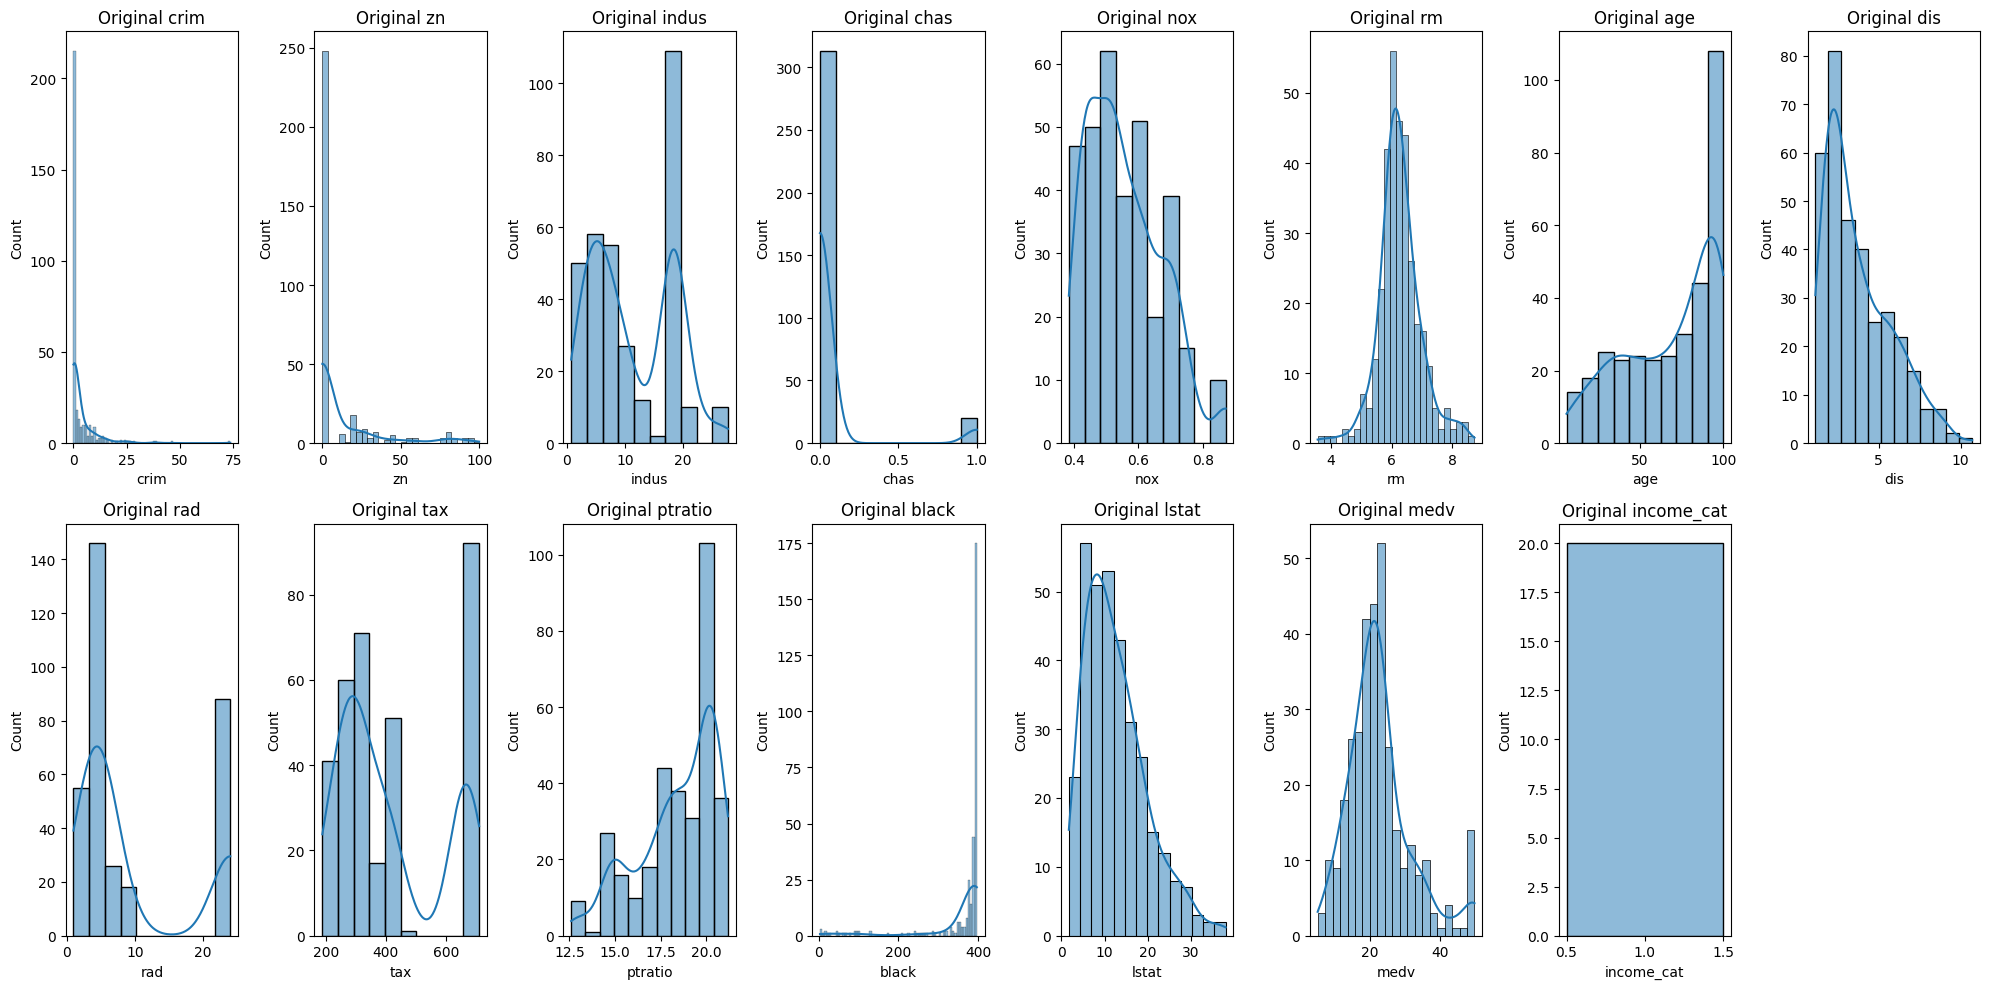

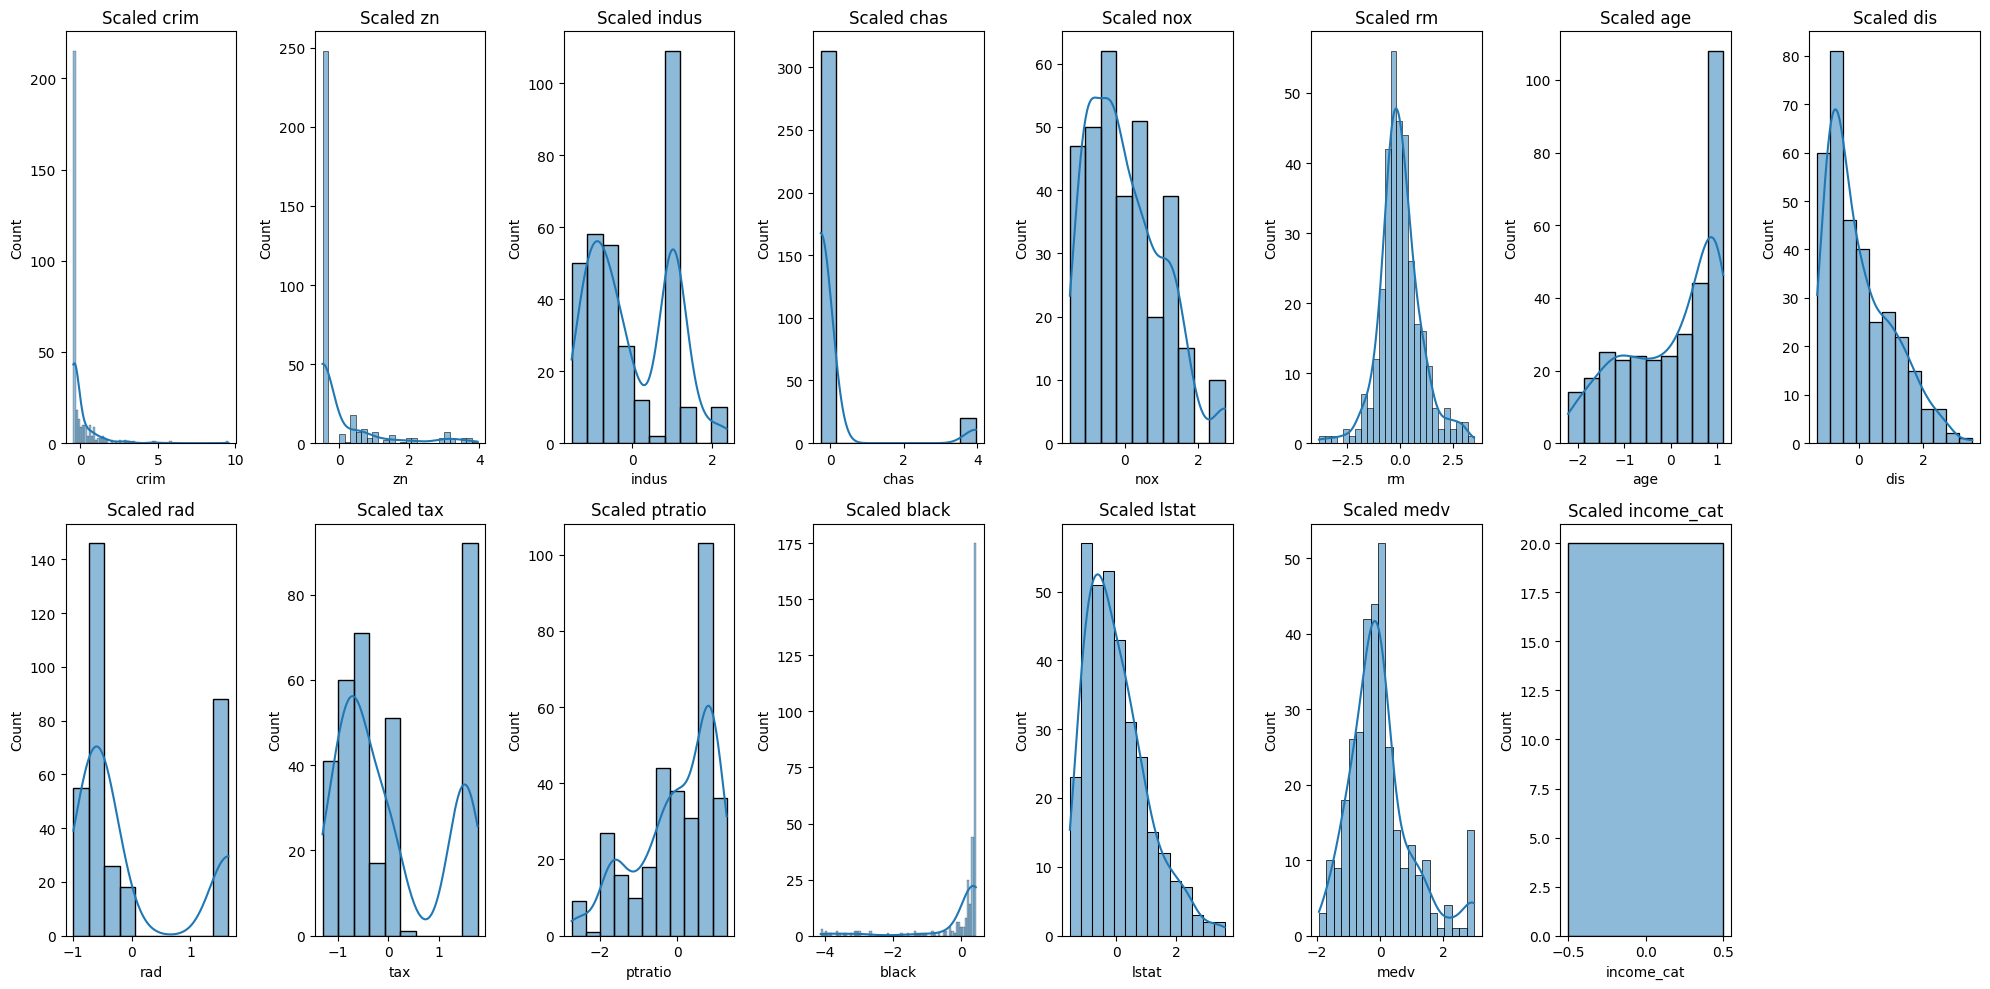

In [42]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns):
    plt.subplot(2, len(df.columns)//2 + 1, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Original {column}')
plt.tight_layout()
plt.show()

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Plot the scaled data distribution
plt.figure(figsize=(20, 10))
for i, column in enumerate(scaled_df.columns):
    plt.subplot(2, len(scaled_df.columns)//2 + 1, i + 1)
    sns.histplot(scaled_df[column], kde=True)
    plt.title(f'Scaled {column}')
plt.tight_layout()
plt.show()

In [ ]:
# List to store the model names and their metrics
results = []

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Linear Regression</h2>

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {lr} model = ", r2)
print(f"MAE of {lr} model = ", mae)
print(f"MSE of {lr} model = ", mse)
print(f"RMSE of {lr} model = ", rmse)
results.append(['Linear Regression', 'lr', mse, mae, r2, rmse])

R2 Score of the LinearRegression() model =  0.8253103071614318
MAE of LinearRegression() model =  3.293820567021854
MSE of LinearRegression() model =  17.60491903701599
RMSE of LinearRegression() model =  4.195821616443672


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Ridge</h2>

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=.5, tol=.01)
ridge.fit(X_train, Y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {ridge} model = ", r2)
print(f"MAE of {ridge} model = ", mae)
print(f"MSE of {ridge} model = ", mse)
print(f"RMSE of {ridge} model = ", rmse)
results.append(['Ridge', 'ridge', mse, mae, r2, rmse])

R2 Score of the Ridge(alpha=0.5, tol=0.01) model =  0.8248652106829566
MAE of Ridge(alpha=0.5, tol=0.01) model =  3.2954739826991157
MSE of Ridge(alpha=0.5, tol=0.01) model =  17.649775074827335
RMSE of Ridge(alpha=0.5, tol=0.01) model =  4.2011635382150185


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Lasso </h2>

In [ ]:
lasso = Lasso(alpha=.01, tol=.03)
lasso.fit(X_train, Y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {lasso} model = ", r2)
print(f"MAE of {lasso} model = ", mae)
print(f"MSE of {lasso} model = ", mse)
print(f"RMSE of {lasso} model = ", rmse)
results.append(['Lasso', 'lasso', mse, mae, r2, rmse])

R2 Score of the Lasso(alpha=0.01, tol=0.03) model =  0.8248858726577286
MAE of Lasso(alpha=0.01, tol=0.03) model =  3.2946512765004794
MSE of Lasso(alpha=0.01, tol=0.03) model =  17.647692797463986
RMSE of Lasso(alpha=0.01, tol=0.03) model =  4.200915709397653


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">SVRegression </h2>

In [ ]:
svr = SVR(kernel='poly', C=15, epsilon=.01)
svr.fit(X_train, Y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {svr} model = ", r2)
print(f"MAE of {svr} model = ", mae)
print(f"MSE of {svr} model = ", mse)
print(f"RMSE of {svr} model = ", rmse)
results.append(['SVR', 'svr', mse, mae, r2, rmse])

R2 Score of the SVR(C=15, epsilon=0.01, kernel='poly') model =  0.6664523728541147
MAE of SVR(C=15, epsilon=0.01, kernel='poly') model =  3.506307757752275
MSE of SVR(C=15, epsilon=0.01, kernel='poly') model =  33.61434138142617
RMSE of SVR(C=15, epsilon=0.01, kernel='poly') model =  5.797787628175611


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">KNeighborsRegressor </h2>

In [ ]:
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, Y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {knn} model = ", r2)
print(f"MAE of {knn} model = ", mae)
print(f"MSE of {knn} model = ", mse)
print(f"RMSE of {knn} model = ", rmse)
results.append(['KNN', 'knn', mse, mae, r2, rmse])

R2 Score of the KNeighborsRegressor(n_neighbors=25) model =  0.676058411732264
MAE of KNeighborsRegressor(n_neighbors=25) model =  3.9413134328358215
MSE of KNeighborsRegressor(n_neighbors=25) model =  32.64626173134329
RMSE of KNeighborsRegressor(n_neighbors=25) model =  5.7136907276596


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Decision Tree Regressor</h2>

In [ ]:
dtr = DecisionTreeRegressor(max_depth=80)
dtr.fit(X_train, Y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {dtr} model = ", r2)
print(f"MAE of {dtr} model = ", mae)
print(f"MSE of {dtr} model = ", mse)
print(f"RMSE of {dtr} model = ", rmse)
results.append(['Decission Tree ', 'dtr', mse, mae, r2, rmse])

R2 Score of the DecisionTreeRegressor(max_depth=80) model =  0.8330396435846227
MAE of DecisionTreeRegressor(max_depth=80) model =  2.913432835820896
MSE of DecisionTreeRegressor(max_depth=80) model =  16.825970149253735
RMSE of DecisionTreeRegressor(max_depth=80) model =  4.101947116828024


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Random Forest Regressor </h2>

In [ ]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=15,
                            criterion='absolute_error',
                            min_samples_split=10)
rfr.fit(X_train, Y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {rfr} model = ", r2)
print(f"MAE of {rfr} model = ", mae)
print(f"MSE of {rfr} model = ", mse)
print(f"RMSE of {rfr} model = ", rmse)
results.append(['Randome Forest Regression', 'rfr', mse, mae, r2, rmse])

R2 Score of the RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      min_samples_split=10) model =  0.9403033351899398
MAE of RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      min_samples_split=10) model =  1.8864850746268642
MSE of RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      min_samples_split=10) model =  6.016124555970145
RMSE of RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      min_samples_split=10) model =  2.4527789455982667


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Ada Boost Regressor </h2>

In [ ]:
abr = AdaBoostRegressor(n_estimators=100, learning_rate=.1)
abr.fit(X_train, Y_train)

y_train_pred = abr.predict(X_train)
y_test_pred = abr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {abr} model = ", r2)
print(f"MAE of {abr} model = ", mae)
print(f"MSE of {abr} model = ", mse)
print(f"RMSE of {abr} model = ", rmse)
results.append(['Ada Boost Regressor', 'abr', mse, mae, r2, rmse])

R2 Score of the AdaBoostRegressor(learning_rate=0.1, n_estimators=100) model =  0.8922503375677818
MAE of AdaBoostRegressor(learning_rate=0.1, n_estimators=100) model =  2.7222432235039187
MSE of AdaBoostRegressor(learning_rate=0.1, n_estimators=100) model =  10.858820875814143
RMSE of AdaBoostRegressor(learning_rate=0.1, n_estimators=100) model =  3.295272504029696


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">XGBRegressor </h2>

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {xgb} model = ", r2)
print(f"MAE of {xgb} model = ", mae)
print(f"MSE of {xgb} model = ", mse)
print(f"RMSE of {xgb} model = ", rmse)
results.append(['XGBRegressor', 'xgb', mse, mae, r2, rmse])

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model =  0.9390011535614137
MAE of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
     

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">MLPRegressor </h2>

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=[128,64,32,4], learning_rate='invscaling', learning_rate_init=.1)
mlp.fit(X_train, Y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {mlp} model = ", r2)
print(f"MAE of {mlp} model = ", mae)
print(f"MSE of {mlp} model = ", mse)
print(f"RMSE of {mlp} model = ", rmse)
results.append(['MLPRegressor', 'mlp', mse, mae, r2, rmse])

R2 Score of the MLPRegressor(hidden_layer_sizes=[128, 64, 32, 4], learning_rate='invscaling',
             learning_rate_init=0.1) model =  0.9003391467485816
MAE of MLPRegressor(hidden_layer_sizes=[128, 64, 32, 4], learning_rate='invscaling',
             learning_rate_init=0.1) model =  2.556563934324939
MSE of MLPRegressor(hidden_layer_sizes=[128, 64, 32, 4], learning_rate='invscaling',
             learning_rate_init=0.1) model =  10.043644957762426
RMSE of MLPRegressor(hidden_layer_sizes=[128, 64, 32, 4], learning_rate='invscaling',
             learning_rate_init=0.1) model =  3.1691710205923607


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;"> GradientBoostingRegressor </h2>

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, loss='huber', max_depth=3, subsample=0.9)
gbr.fit(X_train, Y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {gbr} model = ", r2)
print(f"MAE of {gbr} model = ", mae)
print(f"MSE of {gbr} model = ", mse)
print(f"RMSE of {gbr} model = ", rmse)
results.append(['Gradient Boosting Regressor', 'gbr', mse, mae, r2, rmse])

R2 Score of the GradientBoostingRegressor(loss='huber', n_estimators=200, subsample=0.9) model =  0.9418311886648689
MAE of GradientBoostingRegressor(loss='huber', n_estimators=200, subsample=0.9) model =  1.8049130932357307
MSE of GradientBoostingRegressor(loss='huber', n_estimators=200, subsample=0.9) model =  5.862150178378179
RMSE of GradientBoostingRegressor(loss='huber', n_estimators=200, subsample=0.9) model =  2.4211877619007947


In [ ]:
etr = ExtraTreesRegressor(n_estimators=200, max_depth=12, criterion='absolute_error', bootstrap=False)
etr.fit(X_train, Y_train)

y_train_pred = etr.predict(X_train)
y_test_pred = etr.predict(X_test)

mse = mean_squared_error(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score of the {etr} model = ", r2)
print(f"MAE of {etr} model = ", mae)
print(f"MSE of {etr} model = ", mse)
print(f"RMSE of {etr} model = ", rmse)
results.append(['Extra Trees Regressor', 'etr', mse, mae, r2, rmse])

results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': y_test_pred
})

results_df.head(10)

R2 Score of the ExtraTreesRegressor(criterion='absolute_error', max_depth=12, n_estimators=200) model =  0.9485590114775634
MAE of ExtraTreesRegressor(criterion='absolute_error', max_depth=12, n_estimators=200) model =  1.8742611940298461
MSE of ExtraTreesRegressor(criterion='absolute_error', max_depth=12, n_estimators=200) model =  5.184132065298492
RMSE of ExtraTreesRegressor(criterion='absolute_error', max_depth=12, n_estimators=200) model =  2.2768689170214635


,Actual Values,Predicted Values
0,36.5,35.06575
1,43.1,39.45975
2,22.4,23.50950
3,17.4,19.97375
4,10.8,11.66925
5,29.0,27.95825
6,50.0,45.47575
7,20.6,20.71900
8,31.2,30.35575
9,24.5,27.55000


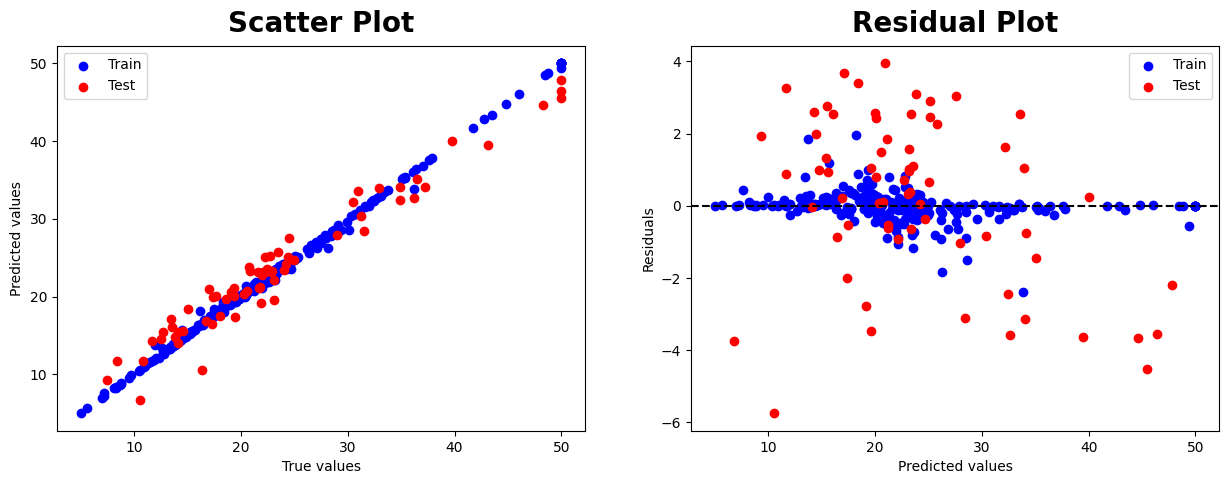

In [ ]:
# Create visualizations
plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred, color='blue', label='Train')
plt.scatter(Y_test, y_test_pred, color='red', label='Test')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="black", size=20, pad=10)

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, y_train_pred - Y_train, color='blue', label='Train')
plt.scatter(y_test_pred, y_test_pred - Y_test, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot', fontweight="black", size=20, pad=10)

plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Comparing Results</h1>

In [ ]:
results_df = pd.DataFrame(results, columns=['Name', 'Model', 'MSE', 'MAE', 'R2 Score', 'RMSE'])
results_df.sort_values(by='R2 Score', ascending=False)

,Name,Model,MSE,MAE,R2 Score,RMSE
7,Extra Trees Regressor,etr,5.284538,1.873690,0.947563,2.298812
11,Gradient Boosting Regressor,gbr,5.862150,1.804913,0.941831,2.421188
6,Randome Forest Regression,rfr,6.016125,1.886485,0.940303,2.452779
9,XGBRegressor,xgb,6.147356,1.936243,0.939001,2.479386
10,MLPRegressor,mlp,10.043645,2.556564,0.900339,3.169171
8,Ada Boost Regressor,abr,10.858821,2.722243,0.892250,3.295273
5,Decission Tree,dtr,16.825970,2.913433,0.833040,4.101947
0,Linear Regression,lr,17.604919,3.293821,0.825310,4.195822
2,Lasso,lasso,17.647693,3.294651,0.824886,4.200916
1,Ridge,ridge,17.649775,3.295474,0.824865,4.201164


<div style=" background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>Finally:</font></h3>

* The **best performing** model untill now is **Extra Trees Regressor** with **highest R2** &  **lowest MAE,MSE,RMSE** values


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">HyperParameter Tunning </h2>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">GridSearchCV</h2>
<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Extra Trees Regressor Tunning</h4>

In [ ]:
param_grid_etr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [12, 13, 14],
    'criterion': ['absolute_error', 'poisson', 'squared_error'],
    'bootstrap': [False, True]
}

grid_search_etr = GridSearchCV(ExtraTreesRegressor(), param_grid_etr, cv=4, scoring='neg_mean_absolute_error')
grid_search_etr.fit(X_train, Y_train)

print(f"Best parameters for ExtraTrees: ", grid_search_etr.best_params_)
print(f"Best score for ExtraTrees: ", -grid_search_etr.best_score_)

best_etr = grid_search_etr.best_estimator_
Y_pred_best_etr = best_etr.predict(X_test)

mae_best_etr = mean_absolute_error(Y_test, Y_pred_best_etr)
r2_best_etr = r2_score(Y_test, Y_pred_best_etr)
mse_best_etr = mean_squared_error(Y_test, Y_pred_best_etr)

print('\nBest ExtraTrees after Grid Search:')
print('R2 score', r2_best_etr)
print('MAE', mae_best_etr)
print('MSE', mse_best_etr)

Best parameters for ExtraTrees:  {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 14, 'n_estimators': 200}
Best score for ExtraTrees:  2.294951854847351

Best ExtraTrees after Grid Search:
R2 score 0.9459940931597315
MAE 1.9416444765075613
MSE 5.44262000805146


<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Gradient Boosting Regressor Tunning</h4>

In [ ]:
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.12, 0.13, 0.14],
    'subsample': [0.8, 0.9, 1.0],
    'loss': ['absolute_error', 'squared_error', 'huber']
}

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=4, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(X_train, Y_train)

print(f"Best parameters for Gradient Boosting: ", grid_search_gbr.best_params_)
print(f"Best score for Gradient Boosting: ", -grid_search_gbr.best_score_)

best_gbr = grid_search_gbr.best_estimator_
Y_pred_best_gbr = best_gbr.predict(X_test)

mae_best_gbr = mean_absolute_error(Y_test, Y_pred_best_gbr)
r2_best_gbr = r2_score(Y_test, Y_pred_best_gbr)
mse_best_gbr = mean_squared_error(Y_test, Y_pred_best_gbr)


print('\nBest Gradient Boosting after Grid Search:')
print('R2 score:', r2_best_gbr)
print('MAE:', mae_best_gbr)
print('MSE', mse_best_gbr)

Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score for Gradient Boosting:  2.2894473845697325

Best Gradient Boosting after Grid Search:
R2 score: 0.9407478266305491
MAE: 1.8431892975222652
MSE 5.971329492807455


<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Random Forest Regressor Tunning</h4>

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [12, 13, 14, 15],
    'criterion': ['absolute_error', 'poisson'],
}

grid_search_rf = GridSearchCV(rfr, param_grid_rf, cv=4, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, Y_train)

print(f"Best parameters for RandomForest: ", grid_search_rf.best_params_)
print(f"Best score for RandomForest: ", -grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
Y_pred_best_rf = best_rf.predict(X_test)

mae_best_rf = mean_absolute_error(Y_test, Y_pred_best_rf)
r2_best_rf = r2_score(Y_test, Y_pred_best_rf)
mse_best_rf = mean_squared_error(Y_test, Y_pred_best_rf)

print('\nBest RandomForest after Grid Search:')
print('R2 score:', r2_best_rf)
print('MAE:', mae_best_rf)
print('MSE', mse_best_rf)

Best parameters for RandomForest:  {'criterion': 'absolute_error', 'max_depth': 12, 'n_estimators': 300}
Best score for RandomForest:  2.51003722862958

Best RandomForest after Grid Search:
R2 score: 0.9415703836791908
MAE: 1.8865149253731408
MSE 5.888433644693252


*  **Extra Trees Regressor** is **highest R2** &  **lowest MAE,MSE,RMSE** also after Tunning it 


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Ensemble Learning</h1>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Voting Regressor</h3>

In [ ]:
model_voting = VotingRegressor(estimators=[
    ('gbr', gbr), 
    ('xgb', xgb),
    ('etr', etr), 
    ('rfr', rfr)],
    weights=[4,4,3,3])
model_voting.fit(X_train, Y_train)
Y_pred_voting = model_voting.predict(X_test)

mae_voting = mean_absolute_error(Y_test, Y_pred_voting)
r2_voting = r2_score(Y_test, Y_pred_voting)
mse_voting = mean_squared_error(Y_test, Y_pred_voting)

print('\nVoting Regressor:')
print('R2 score', r2_voting)
print('MAE', mae_voting)
print('MSE', mse_voting)


Voting Regressor:
R2 score 0.9540039366473907
MAE 1.6867785758944414
MSE 4.635402113234274


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Stacking Regressor</h3>

In [ ]:
model_stack = StackingRegressor([
    ('gbr', gbr), 
    ('xgb', xgb), 
    ('etr', etr), 
    ('rfr', rfr)], 
    final_estimator=lr)
model_stack.fit(X_train, Y_train)
Y_pred_stack = model_stack.predict(X_test)

mae_stack = mean_absolute_error(Y_test, Y_pred_stack)
r2_stack = r2_score(Y_test, Y_pred_stack)
mse_stack = mean_squared_error(Y_test, Y_pred_stack)

print('\nStacking Regressor:')
print('R2 score', r2_stack)
print('MAE', mae_stack)
print('MSE', mse_stack)


Stacking Regressor:
R2 score 0.9561663895749986
MAE 1.6437072614758004
MSE 4.417473922433259


<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">Stacking Regression Ensemble Method is The Bset so We Will Save its Model For further Work </h1></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Saving Model</h1>

In [ ]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model_stack, 'best_stacking_regressor.pkl')

['best_stacking_regressor.pkl']